In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import sys
sys.path.append('..')

# load my own module
from helper import logistic_regression as lr  
from helper import general as general

In [2]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
raw_X = general.get_X(df)
print(raw_X.shape)

raw_y = general.get_y(df)
print(raw_y.shape)

(118, 3)
(118,)


***

In [6]:
m_sample = df.shape[0]
print(m_sample)

118


In [84]:
X_data = raw_X
y_data = raw_y.reshape((m_sample, 1))

In [138]:
batch_size = 100
feature_num = X_data.shape[1]
epoch=2000

***

In [139]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(batch_size, feature_num))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

In [140]:
def sigmoid(z):
    return 1 / (1 + tf.exp(-z))

In [141]:
with tf.variable_scope('logistic-regression'):
    theta = tf.get_variable(name='theta',
                            shape=(feature_num, 1),
                            initializer=tf.constant_initializer())
    
    loss = tf.reduce_mean(-y * tf.log(sigmoid(tf.matmul(X, theta))) - (1 - y) * tf.log(1 - sigmoid(tf.matmul(X, theta))))

In [142]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
opt_operation = opt.minimize(loss)

In [143]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    loss_data = []
    
    for i in range(epoch):
        idx = np.random.choice(m_sample, batch_size)
        X_batch, y_batch= X_data[idx], y_data[idx]
        
        _, loss_val, theta_val = sess.run([opt_operation, loss, theta], feed_dict={X:X_batch, y: y_batch})
        
        loss_data.append(loss_val)

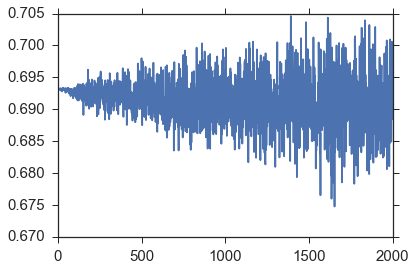

In [144]:
plt.plot(np.arange(epoch), loss_data)

In [130]:
np.mean((lr.sigmoid(X_data @ theta_val) >=0.5).astype(int) == y_data)

0.53389830508474578